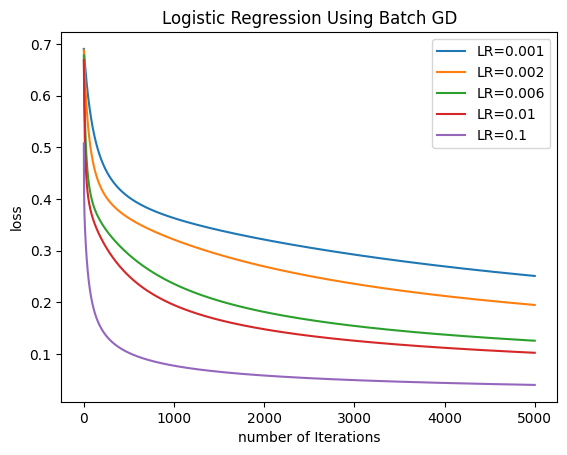

In [ ]:
import numpy as np
import matplotlib.pyplot as plot_graph

# Load the dataset
data = np.genfromtxt('/content/project3_train.csv', delimiter=',')
x_features = data[:, :-1]
y_labels = data[:, -1]
# Add a column of ones to X for the bias term
x_features= np.c_[np.ones(x_features.shape[0]), x_features]
# Batch gradient descent
def gd_func(x_features, y_labels, theta, alpha, Nofiterations):
    m = len(y_labels)
    losses = []
    #calculating loss
    for i in range(Nofiterations):
        h = sigmoid(np.dot(x_features, theta))
        gradient = np.dot(x_features.T, (h - y_labels)) / m
        theta -= alpha * gradient
        loss = calculate_loss_func(x_features, y_labels, theta)
        losses.append(loss)
    return theta, losses
# Sigmoid function
def sigmoid(p):
    return 1 / (1 + np.exp(-p))
# Loss Calculating function
def calculate_loss_func(x_features, y_labels, theta):
    m = len(y_labels)
    h = sigmoid(np.dot(x_features, theta))
    return (-1 / m) * np.sum(y_labels * np.log(h) + (1 - y_labels) * np.log(1 - h))
# Plot the results as graph for different learning rates
learning_rates = [0.001, 0.002, 0.006, 0.01, 0.1]
Nofiterations = 5000
for lr in learning_rates:
    theta_initial = np.zeros(x_features.shape[1])
    theta, losses = gd_func(x_features, y_labels, theta_initial, lr, Nofiterations)
    plot_graph.plot(range(Nofiterations), losses, label=f'LR={lr}')
plot_graph.title('Logistic Regression Using Batch GD')
plot_graph.xlabel('number of Iterations')
plot_graph.ylabel('loss')
plot_graph.legend()
plot_graph.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
np.seterr(divide='ignore')
# Loading the train and test Datasets
X_Data_Train = np.genfromtxt('/content/project3_train.csv', delimiter=',')
X_Data_Test = np.genfromtxt('/content/project3_test.csv', delimiter=',')
# Extracting features and labels
X_Train = X_Data_Train[:, :-1]
Y_Train = X_Data_Train[:, -1]
X_Test = X_Data_Test[:, :-1]
Y_Test = X_Data_Test[:, -1]
# For the bias term, add a column of ones to X.
X_Train = np.c_[np.ones(X_Train.shape[0]), X_Train]
X_Test = np.c_[np.ones(X_Test.shape[0]), X_Test]
# Logistic regression
def logistic_regression(X, y, alpha, num_of_iterations, gradient_descent_type='batch', batch_size=None):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []
    start_time = time.time()
    for i in range(num_of_iterations):
        if gradient_descent_type == 'stochastic': #Stochastic Gradient Descent
            rand_idx = np.random.randint(m)
            X_batch, y_batch = X[rand_idx, :], y[rand_idx]
        elif gradient_descent_type == 'mini-batch': #Mini Batch Gradient Descent
            rand_idx = np.random.choice(m, batch_size, replace=False)
            X_batch, y_batch = X[rand_idx, :], y[rand_idx]
        else:  # Batch gradient descent
            X_batch, y_batch = X, y
        h = sigmoid(np.dot(X_batch, theta))
        gradient = np.dot(X_batch.T, (h - y_batch)) / m
        theta -= alpha * gradient
        # Calculating loss
        try:
            loss = (-1 / m) * np.sum(y_batch * np.log(h) + (1 - y_batch) * np.log(1 - h))
            losses.append(loss)
        except:
            print("Exception")
    end_time = time.time()
    elapsed_time = end_time - start_time
    return theta, losses, elapsed_time
# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)
# Function to make predictions
def predict(X, theta):
    prob = sigmoid(np.dot(X, theta))
    return (prob >= 0.5).astype(int)
num_of_iterations = 300000
alpha = 0.1
batch_size = 5
theta_sgd, losses_sgd, time_sgd = logistic_regression(X_Train, Y_Train, alpha, num_of_iterations, 'stochastic')
theta_mini_batch, losses_mini_batch, time_mini_batch = logistic_regression(X_Train, Y_Train, alpha, num_of_iterations, 'mini-batch', batch_size)
theta_batch, losses_batch, time_batch = logistic_regression(X_Train, Y_Train, alpha, num_of_iterations, 'batch')
y_train_pred_sgd = predict(X_Train, theta_sgd)
y_train_pred_mini_batch = predict(X_Train, theta_mini_batch)
y_train_pred_batch = predict(X_Train, theta_batch)
y_test_pred_sgd = predict(X_Test, theta_sgd)
y_test_pred_mini_batch = predict(X_Test, theta_mini_batch)
y_test_pred_batch = predict(X_Test, theta_batch)
# Calculate accuracy
accuracy_train_sgd = calculate_accuracy(Y_Train, y_train_pred_sgd)
accuracy_train_mini_batch = calculate_accuracy(Y_Train, y_train_pred_mini_batch)
accuracy_train_batch = calculate_accuracy(Y_Train, y_train_pred_batch)
accuracy_test_sgd = calculate_accuracy(Y_Test, y_test_pred_sgd)
accuracy_test_mini_batch = calculate_accuracy(Y_Test, y_test_pred_mini_batch)
accuracy_test_batch = calculate_accuracy(Y_Test, y_test_pred_batch)
# Sigmoid function
def sigmoid(p):
    return 1 / (1 + np.exp(-p))
print("Stochastic Gradient Descent - Thetas:", theta_sgd)
print("Time taken to execute:", time_sgd, "seconds")
print("Accuracy for train data:", accuracy_train_sgd)
print("Accuracy for test data:", accuracy_test_sgd)

print("\nMini-Batch Gradient Descent - Thetas", theta_mini_batch)
print("Time taken to execute:", time_mini_batch, "seconds")
print("Accuracy for train data:", accuracy_train_mini_batch)
print("Accuracy for test data:", accuracy_test_mini_batch)

print("\nBatch Gradient Descent - Thetas", theta_batch)
print("Time taken to execute:", time_batch, "seconds")
print("Accuracy for train data:", accuracy_train_batch)
print("Accuracy for test data:", accuracy_test_batch)



Stochastic Gradient Descent - Thetas: [-2.47834367  0.75882351  0.48119946  0.35503914]
Time taken to execute: 6.660197019577026 seconds
Accuracy for train data: 0.979
Accuracy for test data: 1.0

Mini-Batch Gradient Descent - Thetas [-4.91030293  1.37623373  0.84616216  0.65668446]
Time taken to execute: 15.69939136505127 seconds
Accuracy for train data: 0.994
Accuracy for test data: 1.0

Batch Gradient Descent - Thetas [-28.78328554   7.80612398   4.76399168   3.76359471]
Time taken to execute: 15.667508602142334 seconds
Accuracy for train data: 0.999
Accuracy for test data: 1.0
